In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
%cd /content/drive/MyDrive/Course Material/Supervised Machine Learning/Regression Analysis

/content/drive/MyDrive/Course Material/Supervised Machine Learning/Regression Analysis


# Importing Data

In [52]:
# Read the CSV file into a DataFrame: df
data = pd.read_csv('polyreg.csv')

In [53]:
data

,Experience,Salary
0,1,39000
1,2,45000
2,3,55000
3,4,70000
4,5,90000
5,6,120000
6,7,160000
7,8,220000
8,9,300000
9,10,450000


# Finding Values of Independent and Dependent data

In [54]:
X = data['Experience'].values
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [55]:
y = data['Salary'].values
y

array([ 39000,  45000,  55000,  70000,  90000, 120000, 160000, 220000,
       300000, 450000])

(0.0, 450000.0)

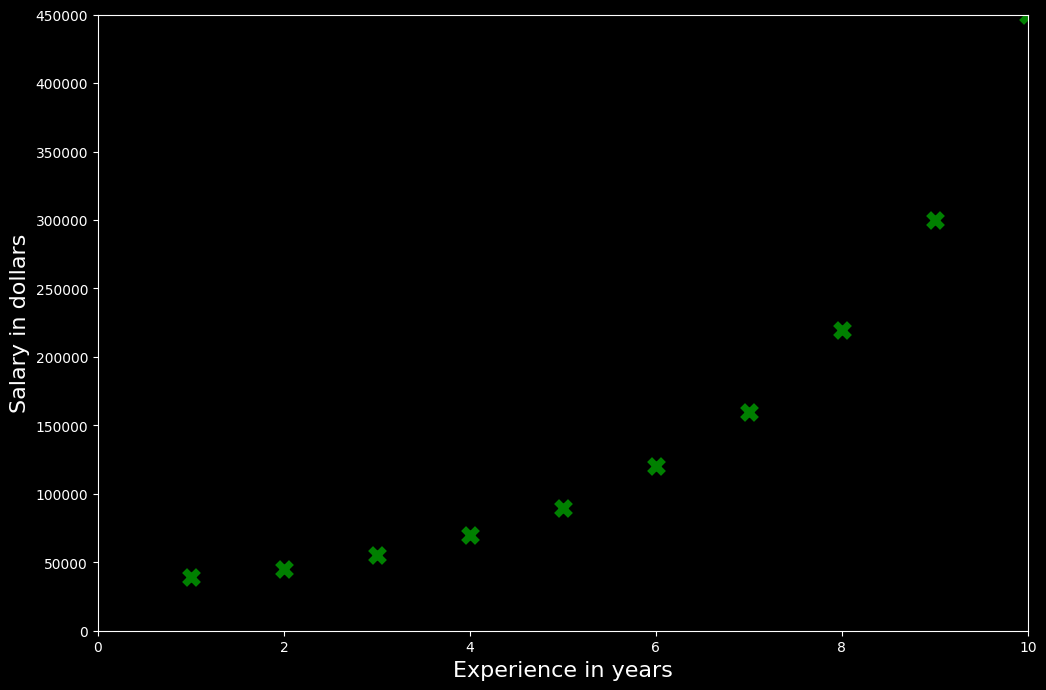

In [56]:
plt.figure(figsize=(12,8))
plt.scatter(X, y, marker = "x", s = 100, color = 'g', lw =5)
plt.xlabel('Experience in years', fontsize = 16)
plt.ylabel('Salary in dollars', fontsize = 16)
plt.xlim([0, X.max()])
plt.ylim([0, y.max()])

# Polynomial Regression Using sklearn

In [57]:
X = X.reshape(-1,1)
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

## The following three lines of codes will convert matrix X into the polynomial form

In [79]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree = 4) # instantiate polynomial Regression
X_poly = poly_feat.fit_transform(X).round(1)

In [80]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

## Since polynomial Regression is also a Linear Regression, therefore we will import Linear Regression to fit on X_poly and y.

In [81]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
model = lin_reg.fit(X_poly, y)

In [82]:
print('intercept:', model.intercept_)
print('Coefficients:', model.coef_)

intercept: 57083.333333405724
Coefficients: [     0.         -29820.5128206   15231.20629373  -2301.57342658
    146.70745921]


In [83]:
y_pred = model.predict(X_poly)

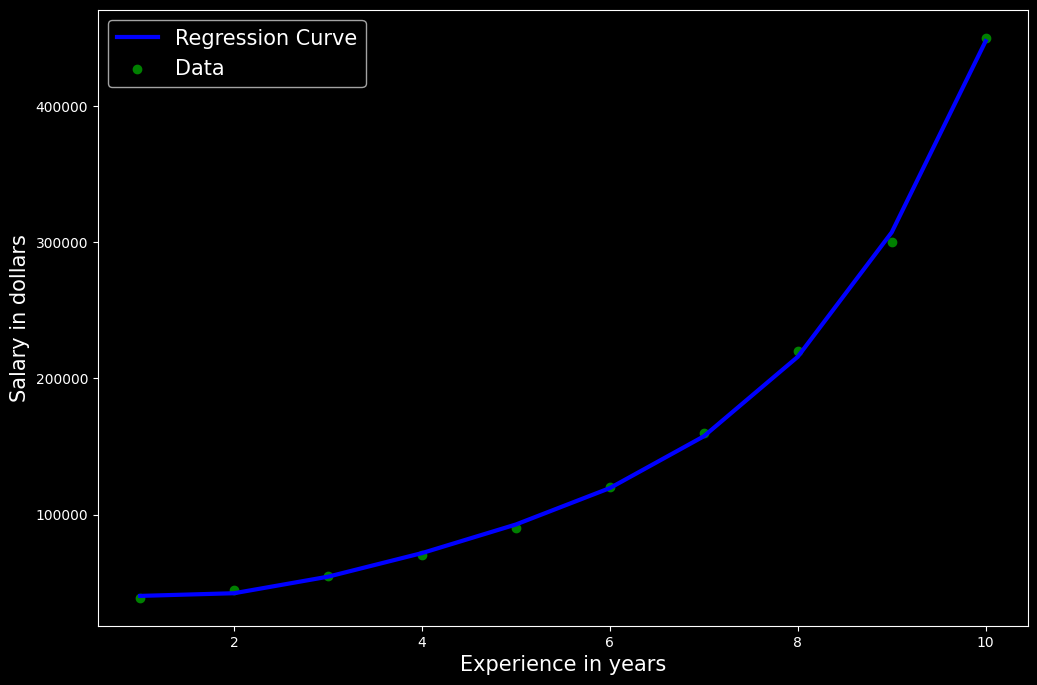

In [84]:
plt.figure(figsize=(12,8))
plt.plot(X,y_pred, color='blue', lw = 3, label='Regression Curve')
plt.scatter(X, y, c='green', label='Data')
plt.xlabel('Experience in years', fontsize = 15)
plt.ylabel('Salary in dollars', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

# Evaluating Performance of Polynomial Regression

In [85]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('R2:', metrics.r2_score(y, y_pred))

RMSE: 3181.229549281459
MAE: 2595.9207459213053
R2: 0.9993695779787429
